In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 [>.............................] - ETA: 7s - loss: 1.8797 - accuracy: 0.1484
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.8074 - accuracy: 0.1974 - val_loss: 1.6343 - val_accuracy: 0.3615
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.6854 - accuracy: 0.3203
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.6504 - accuracy: 0.3134 - val_loss: 1.5409 - val_accuracy: 0.4309
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.6353 - accuracy: 0.3906
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.5747 - accuracy: 0.3474 - val_loss: 1.4634 - val_accuracy: 0.4380
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.5166 - accuracy: 0.3984
E

 1/30 [>.............................] - ETA: 0s - loss: 0.8369 - accuracy: 0.6406
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.8176 - accuracy: 0.6718 - val_loss: 0.5168 - val_accuracy: 0.8737
Epoch 29/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.8558 - accuracy: 0.6641
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.8006 - accuracy: 0.6868 - val_loss: 0.4991 - val_accuracy: 0.8761
Epoch 30/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.8644 - accuracy: 0.6484
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.7956 - accuracy: 0.6903 - val_loss: 0.4810 - val_accuracy: 0.8879
Epoch 31/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.8372 - accuracy: 0.6406
Epoch 31

 1/30 [>.............................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7344
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7476 - val_loss: 0.3376 - val_accuracy: 0.9179
Epoch 56/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7656
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7453 - val_loss: 0.3346 - val_accuracy: 0.9250
Epoch 57/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5775 - accuracy: 0.7656
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.7432 - val_loss: 0.3312 - val_accuracy: 0.9187
Epoch 58/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7901 - accuracy: 0.6406
Epoch 58

 1/30 [>.............................] - ETA: 0s - loss: 0.6129 - accuracy: 0.7578
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7532 - val_loss: 0.2839 - val_accuracy: 0.9400
Epoch 83/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6256 - accuracy: 0.7344
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7639 - val_loss: 0.2787 - val_accuracy: 0.9392
Epoch 84/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7770 - accuracy: 0.7188
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7658 - val_loss: 0.2770 - val_accuracy: 0.9479
Epoch 85/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7024 - accuracy: 0.7344
Epoch 85

 1/30 [>.............................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7500
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7845 - val_loss: 0.2531 - val_accuracy: 0.9463
Epoch 110/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5594 - accuracy: 0.7812
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7900 - val_loss: 0.2495 - val_accuracy: 0.9471
Epoch 111/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5875 - accuracy: 0.7266
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7711 - val_loss: 0.2531 - val_accuracy: 0.9440
Epoch 112/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7969
Ep

Epoch 136/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6741 - accuracy: 0.6953
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7837 - val_loss: 0.2388 - val_accuracy: 0.9542
Epoch 137/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5512 - accuracy: 0.7734
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7871 - val_loss: 0.2377 - val_accuracy: 0.9542
Epoch 138/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4820 - accuracy: 0.8438
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7813 - val_loss: 0.2416 - val_accuracy: 0.9550
Epoch 139/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5306 - accu

Epoch 163/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5242 - accuracy: 0.8203
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7921 - val_loss: 0.2239 - val_accuracy: 0.9605
Epoch 164/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6111 - accuracy: 0.7656
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7818 - val_loss: 0.2283 - val_accuracy: 0.9590
Epoch 165/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5875 - accuracy: 0.7266
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7892 - val_loss: 0.2314 - val_accuracy: 0.9582
Epoch 166/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6203 - accu

Epoch 190/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8438
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.8137 - val_loss: 0.2131 - val_accuracy: 0.9597
Epoch 191/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5977 - accuracy: 0.7734
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7871 - val_loss: 0.2190 - val_accuracy: 0.9613
Epoch 192/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6638 - accuracy: 0.7734
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7968 - val_loss: 0.2170 - val_accuracy: 0.9605
Epoch 193/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6174 - accu

Epoch 217/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5867 - accuracy: 0.7656
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.8074 - val_loss: 0.2125 - val_accuracy: 0.9621
Epoch 218/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5604 - accuracy: 0.8047
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8037 - val_loss: 0.2121 - val_accuracy: 0.9653
Epoch 219/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5089 - accuracy: 0.8359
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8005 - val_loss: 0.2168 - val_accuracy: 0.9684
Epoch 220/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4085 - accu

Epoch 244/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6260 - accuracy: 0.7500
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7932 - val_loss: 0.2091 - val_accuracy: 0.9629
Epoch 245/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5570 - accuracy: 0.8125
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7997 - val_loss: 0.2111 - val_accuracy: 0.9653
Epoch 246/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8125
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.8013 - val_loss: 0.2178 - val_accuracy: 0.9637
Epoch 247/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4204 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 667us/step - loss: 0.2091 - accuracy: 0.9629


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.7510718e-02 2.9024363e-02 1.0932138e-01 1.2118821e-03 8.4275144e-01
 1.8024325e-04]
4


# Confusion matrix

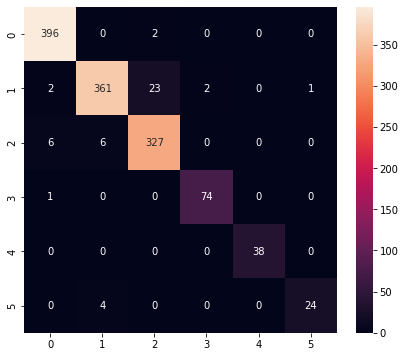

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       398
           1       0.97      0.93      0.95       389
           2       0.93      0.96      0.95       339
           3       0.97      0.99      0.98        75
           4       1.00      1.00      1.00        38
           5       0.96      0.86      0.91        28

    accuracy                           0.96      1267
   macro avg       0.97      0.96      0.96      1267
weighted avg       0.96      0.96      0.96      1267



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\65972\AppData\Local\Temp\tmpalp23ss_\assets


6496

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7510727e-02 2.9024351e-02 1.0932140e-01 1.2118821e-03 8.4275138e-01
 1.8024340e-04]
4
